# TASK 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [4]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ideal_df = pd.read_csv('ideal.csv')

In [5]:
# Function to compute the least-squares error
def least_squares_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Step 2: Find the best fit functions
best_fit_functions = {}
for train_col in train_df.columns[1:]:
    min_error = float('inf')
    best_function = None
    for ideal_col in ideal_df.columns[1:]:
        error = least_squares_error(train_df[train_col], ideal_df[ideal_col])
        if error < min_error:
            min_error = error
            best_function = ideal_col
    best_fit_functions[train_col] = best_function

# Step 3: Map test data
mapped_test_data = []

for _, test_row in test_df.iterrows():
    x_test, y_test = test_row['x'], test_row['y']
    for train_col, ideal_col in best_fit_functions.items():
        x_ideal = ideal_df['x']
        y_ideal = ideal_df[ideal_col]
        y_interp = np.interp(x_test, x_ideal, y_ideal)
        
        train_y = train_df[train_col]
        ideal_y = ideal_df[ideal_col]
        max_deviation = np.max(np.abs(train_y - ideal_y))
        
        if np.abs(y_test - y_interp) <= max_deviation * np.sqrt(2):
            deviation = np.abs(y_test - y_interp)
            mapped_test_data.append([x_test, y_test, ideal_col, y_interp, deviation])
            break

# Convert the mapped test data to a DataFrame
mapped_test_df = pd.DataFrame(mapped_test_data, columns=['x_test', 'y_test', 'ideal_function', 'y_interp', 'deviation'])


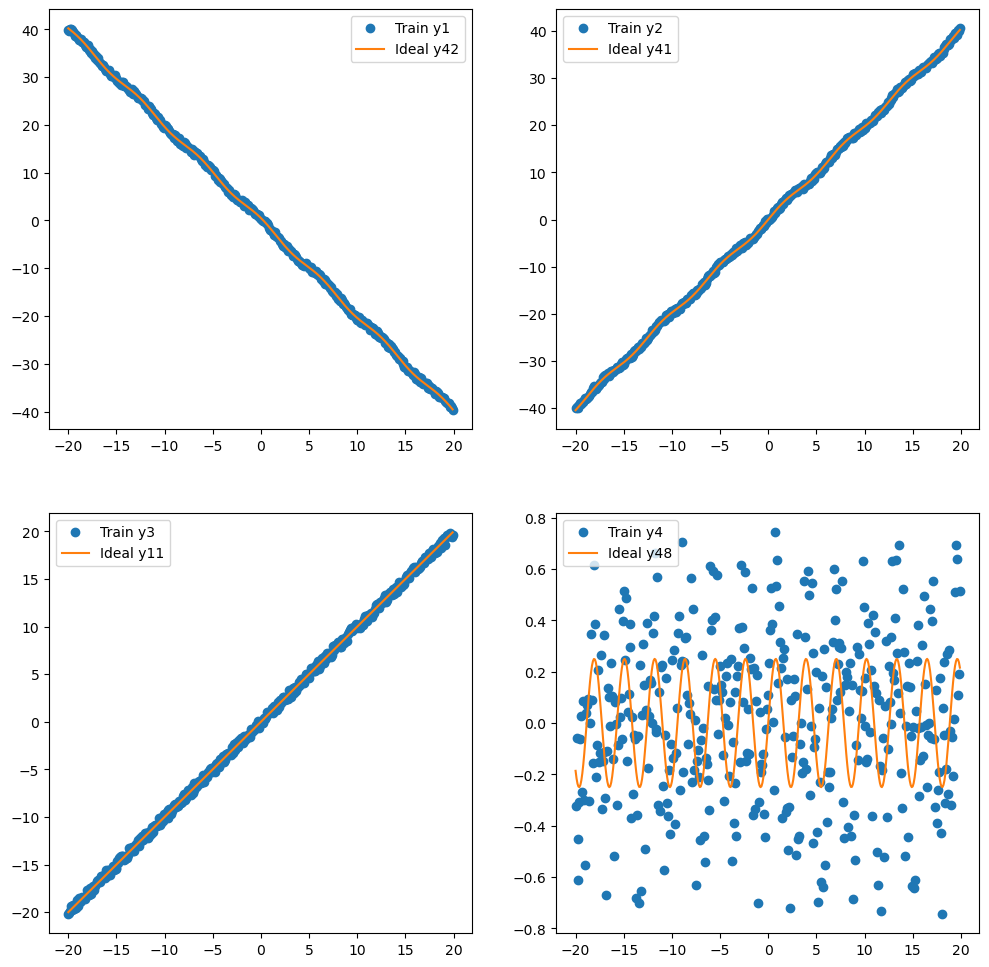

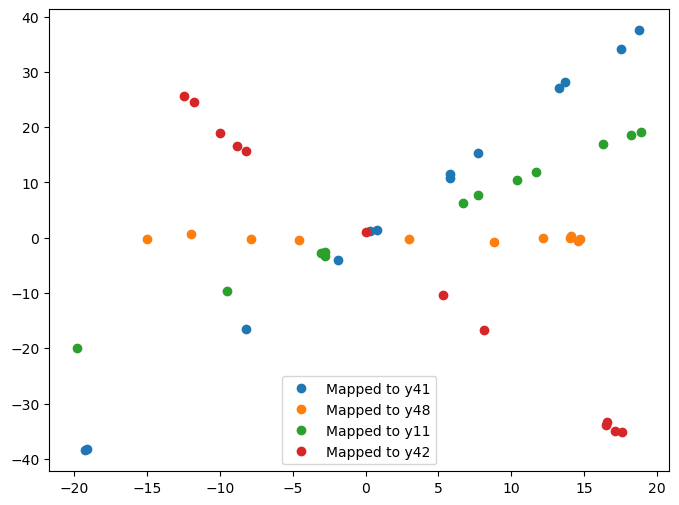

In [6]:
# Step 4: Visualize the data
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for i, (train_col, ideal_col) in enumerate(best_fit_functions.items()):
    ax[i//2, i%2].plot(train_df['x'], train_df[train_col], 'o', label=f'Train {train_col}')
    ax[i//2, i%2].plot(ideal_df['x'], ideal_df[ideal_col], '-', label=f'Ideal {ideal_col}')
    ax[i//2, i%2].legend()

fig, ax = plt.subplots(figsize=(8, 6))

for ideal_col in mapped_test_df['ideal_function'].unique():
    subset = mapped_test_df[mapped_test_df['ideal_function'] == ideal_col]
    ax.plot(subset['x_test'], subset['y_test'], 'o', label=f'Mapped to {ideal_col}')

ax.legend()
plt.show()

# Task 2

In [17]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, Column, Float, String, Table, MetaData
from sqlalchemy.orm import declarative_base, sessionmaker
from sqlalchemy.exc import IntegrityError
import bokeh.plotting as bk
import bokeh.models as bm
from bokeh.layouts import gridplot
import unittest

# Define SQLAlchemy ORM base
Base = declarative_base()

class TrainingData(Base):
    __tablename__ = 'training_data'
    x = Column(Float, primary_key=True)
    y1 = Column(Float)
    y2 = Column(Float)
    y3 = Column(Float)
    y4 = Column(Float)

class IdealFunctions(Base):
    __tablename__ = 'ideal_functions'
    x = Column(Float, primary_key=True)
    y1 = Column(Float)
    y2 = Column(Float)
    y3 = Column(Float)
    y4 = Column(Float)
    y5 = Column(Float)
    y6 = Column(Float)
    y7 = Column(Float)
    y8 = Column(Float)
    y9 = Column(Float)
    y10 = Column(Float)
    y11 = Column(Float)
    y12 = Column(Float)
    y13 = Column(Float)
    y14 = Column(Float)
    y15 = Column(Float)
    y16 = Column(Float)
    y17 = Column(Float)
    y18 = Column(Float)
    y19 = Column(Float)
    y20 = Column(Float)
    y21 = Column(Float)
    y22 = Column(Float)
    y23 = Column(Float)
    y24 = Column(Float)
    y25 = Column(Float)
    y26 = Column(Float)
    y27 = Column(Float)
    y28 = Column(Float)
    y29 = Column(Float)
    y30 = Column(Float)
    y31 = Column(Float)
    y32 = Column(Float)
    y33 = Column(Float)
    y34 = Column(Float)
    y35 = Column(Float)
    y36 = Column(Float)
    y37 = Column(Float)
    y38 = Column(Float)
    y39 = Column(Float)
    y40 = Column(Float)
    y41 = Column(Float)
    y42 = Column(Float)
    y43 = Column(Float)
    y44 = Column(Float)
    y45 = Column(Float)
    y46 = Column(Float)
    y47 = Column(Float)
    y48 = Column(Float)
    y49 = Column(Float)
    y50 = Column(Float)

class TestData(Base):
    __tablename__ = 'test_data'
    x = Column(Float, primary_key=True)
    y = Column(Float)
    delta_y = Column(Float)
    ideal_func = Column(String)

In [18]:
class DataHandler:
    def __init__(self, db_filename):
        self.engine = create_engine(f'sqlite:///{db_filename}')
        Base.metadata.create_all(self.engine)
        self.Session = sessionmaker(bind=self.engine)
        self.session = self.Session()
    
    def load_csv_to_db(self, csv_filename, table_class):
        df = pd.read_csv(csv_filename)
        df.to_sql(table_class.__tablename__, self.engine, if_exists='replace', index=False)

    def get_table(self, table_class):
        return pd.read_sql_table(table_class.__tablename__, self.engine)

    def add_test_data(self, x, y, delta_y, ideal_func):
        test_data = self.session.query(TestData).filter_by(x=x).first()
        if test_data:
            test_data.y = y
            test_data.delta_y = delta_y
            test_data.ideal_func = ideal_func
        else:
            new_test_data = TestData(x=x, y=y, delta_y=delta_y, ideal_func=ideal_func)
            self.session.add(new_test_data)
        self.session.commit()

In [19]:
class FunctionMapper:
    def __init__(self, training_df, ideal_df):
        self.training_df = training_df
        self.ideal_df = ideal_df
        self.best_fit_functions = self.find_best_fit_functions()

    def find_best_fit_functions(self):
        best_fit = {}
        for col in self.training_df.columns[1:]:
            min_error = float('inf')
            best_func = None
            for ideal_col in self.ideal_df.columns[1:]:
                error = np.sum((self.training_df[col] - self.ideal_df[ideal_col]) ** 2)
                if error < min_error:
                    min_error = error
                    best_func = ideal_col
            best_fit[col] = best_func
        return best_fit

    def map_test_data(self, test_df):
        mapped_data = []
        for _, test_row in test_df.iterrows():
            x_test, y_test = test_row['x'], test_row['y']
            for train_col, ideal_col in self.best_fit_functions.items():
                x_ideal = self.ideal_df['x']
                y_ideal = self.ideal_df[ideal_col]
                y_interp = np.interp(x_test, x_ideal, y_ideal)
                
                train_y = self.training_df[train_col]
                ideal_y = self.ideal_df[ideal_col]
                max_deviation = np.max(np.abs(train_y - ideal_y))
                
                if np.abs(y_test - y_interp) <= max_deviation * np.sqrt(2):
                    deviation = np.abs(y_test - y_interp)
                    mapped_data.append([x_test, y_test, deviation, ideal_col])
                    break
        return pd.DataFrame(mapped_data, columns=['x', 'y', 'delta_y', 'ideal_func'])


In [20]:
class Visualization:
    @staticmethod
    def plot_data(training_df, ideal_df, mapped_test_df):
        p1 = bk.figure(title="Training Data vs Ideal Functions", x_axis_label='x', y_axis_label='y')
        for col in training_df.columns[1:]:
            p1.circle(training_df['x'], training_df[col], legend_label=col)
        for col in ideal_df.columns[1:]:
            p1.line(ideal_df['x'], ideal_df[col], legend_label=col)
        
        p2 = bk.figure(title="Mapped Test Data", x_axis_label='x', y_axis_label='y')
        for ideal_col in mapped_test_df['ideal_func'].unique():
            subset = mapped_test_df[mapped_test_df['ideal_func'] == ideal_col]
            p2.circle(subset['x'], subset['y'], legend_label=f'Mapped to {ideal_col}')
        
        grid = gridplot([[p1], [p2]])
        bk.show(grid)

class CustomException(Exception):
    """Custom exception for handling specific errors"""
    pass

# Inherit from the base class for handling specific cases
class SpecificException(CustomException):
    """Exception for a specific case"""
    pass

In [21]:
# Main execution
def main():
    try:
        # Initialize data handler and load data
        db_filename = 'functions.db'
        data_handler = DataHandler(db_filename)
        
        data_handler.load_csv_to_db('train.csv', TrainingData)
        data_handler.load_csv_to_db('ideal.csv', IdealFunctions)
        test_df = pd.read_csv('test.csv')
        
        # Retrieve data from database
        training_df = data_handler.get_table(TrainingData)
        ideal_df = data_handler.get_table(IdealFunctions)
        
        # Map test data
        function_mapper = FunctionMapper(training_df, ideal_df)
        mapped_test_df = function_mapper.map_test_data(test_df)
        
        # Add mapped test data to the database
        for _, row in mapped_test_df.iterrows():
            data_handler.add_test_data(row['x'], row['y'], row['delta_y'], row['ideal_func'])
        
        # Visualize data
        Visualization.plot_data(training_df, ideal_df, mapped_test_df)
    
    except FileNotFoundError as e:
        print(f"Error: {e}")
    except CustomException as e:
        print(f"Custom Error: {e}")

# Run the main function
if __name__ == '__main__':
    main()